# Leveling Up Game Strategy: Analyzing Sales Patterns, Platforms, and Player Feedback in the Video Game Industry

## Introduction 

The global video game market is a dynamic and competitive industry where understanding what drives success can make or break a title. From platform trends and genre preferences to the impact of reviews, developers and publishers must consider a wide range of factors when making decisions about game design, marketing, and release strategies. This project explores the relationships between video game sales, user and critic reviews, platform dominance, and genre popularity to uncover actionable insights that can inform better business and creative decisions.

## Project Overview

This analysis uses a dataset of global video game sales from various platforms, genres, and regions. It includes numerical ratings from both users and professional critics, as well as sales data split by region (North America, Europe, Japan, and others). The goals of the project are:

    * To investigate how sales vary by platform, genre, and release year

    * To examine the relationship between review scores and total game sales

    * To identify regional differences and preferences in gaming behavior

    * To apply hypothesis testing to validate assumptions about player ratings across platforms and genres

By combining data visualization with statistical analysis, this project offers insights into both consumer behavior and product performance in the gaming market.

## Hypotheses

#### Hypothesis 1: Platform Ratings Comparison

* Null Hypothesis (H₀): The average user ratings for Xbox One and PC games are equal.

* Alternative Hypothesis (H₁): There is a significant difference in user ratings between Xbox One and PC games.

#### Hypothesis 2: Genre Ratings Comparison

* Null Hypothesis (H₀): The average user ratings for Action and Sports games are equal.

* Alternative Hypothesis (H₁): There is a significant difference in user ratings between Action and Sports games.

#### Additional Test: Era-Based Ratings Comparison

* Null Hypothesis (H₀): The average user ratings for games released before 2010 and after 2010 are equal.

* Alternative Hypothesis (H₁): There is a significant difference in user ratings between pre-2010 and post-2010 game releases.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import os

#print(os.getcwd())
warnings.filterwarnings("ignore")

# Constants
ALPHA = 0.05

In [2]:
# Load Data
file_path = 'datasets/games.csv'

# Optional safety check
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Load the dataset
df = pd.read_csv(file_path)

#Prep the Data
df.columns = df.columns.str.lower()
df = df.dropna(subset=['year_of_release', 'name', 'genre'])
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['rating'].fillna('Unknown', inplace=True)
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [3]:
#  Key Performance Indicators (KPIs)
# Compute KPIs
top_platform_avg_sales = df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
top_genre_median_sales = df.groupby('genre')['total_sales'].median().sort_values(ascending=False)
region_sales = {
    'North America': df['na_sales'].sum(),
    'Europe': df['eu_sales'].sum(),
    'Japan': df['jp_sales'].sum(),
    'Other': df['other_sales'].sum()
}
region_sales_series = pd.Series(region_sales).sort_values(ascending=False)
critic_corr = df['critic_score'].corr(df['total_sales'])
percent_highly_rated = (len(df[df['user_score'] >= 8]) / len(df)) * 100
top_game = df[df['total_sales'] == df['total_sales'].max()][['name', 'total_sales']]


print("\n Top platform by average sales:")
top_platform_avg_sales = df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print(top_platform_avg_sales.head(1))

print("\n Genre with highest median sales:")
top_genre_median_sales = df.groupby('genre')['total_sales'].median().sort_values(ascending=False)
print(top_genre_median_sales.head(1))

print("\n Region with highest total sales:")
region_sales = {
    'NA': df['na_sales'].sum(),
    'EU': df['eu_sales'].sum(),
    'JP': df['jp_sales'].sum(),
    'Other': df['other_sales'].sum()
}
region_sales = pd.Series(region_sales).sort_values(ascending=False)
print(region_sales.head(1))

print("\n Correlation between critic scores and total sales:")
critic_corr = df['critic_score'].corr(df['total_sales'])
print(round(critic_corr, 2))

print("\n Percentage of games rated 8+ by users:")
highly_rated_games = df[df['user_score'] >= 8]
percent_highly_rated = (len(highly_rated_games) / len(df)) * 100
print(f"{percent_highly_rated:.2f}% of games have a user score of 8 or higher.")

print("\n Highest-selling game overall:")
top_game = df[df['total_sales'] == df['total_sales'].max()][['name', 'total_sales']]
print(top_game.to_string(index=False))



 Top platform by average sales:
platform
GB    2.62299
Name: total_sales, dtype: float64

 Genre with highest median sales:
genre
Platform    0.27
Name: total_sales, dtype: float64

 Region with highest total sales:
NA    4341.42
dtype: float64

 Correlation between critic scores and total sales:
0.25

 Percentage of games rated 8+ by users:
15.47% of games have a user score of 8 or higher.

 Highest-selling game overall:
      name  total_sales
Wii Sports        82.54


The analysis revealed that the Game Boy (GB) platform leads in average sales per game, with an impressive 2.62 million units sold on average. In terms of genre performance, platform games achieved the highest median sales, indicating consistent popularity and profitability within that category. Regionally, North America dominated global sales, contributing over 4.3 billion units, making it the most lucrative market. A moderate positive correlation of 0.25 was found between critic scores and total sales, suggesting that while better-reviewed games tend to sell more, the relationship isn’t overwhelmingly strong. Only 15.47% of games received a user rating of 8 or higher, highlighting the relative rarity of critically well-received titles. Among all games analyzed, Wii Sports emerged as the top-selling title, with a staggering 82.54 million units sold worldwide, underscoring its broad appeal and market impact.

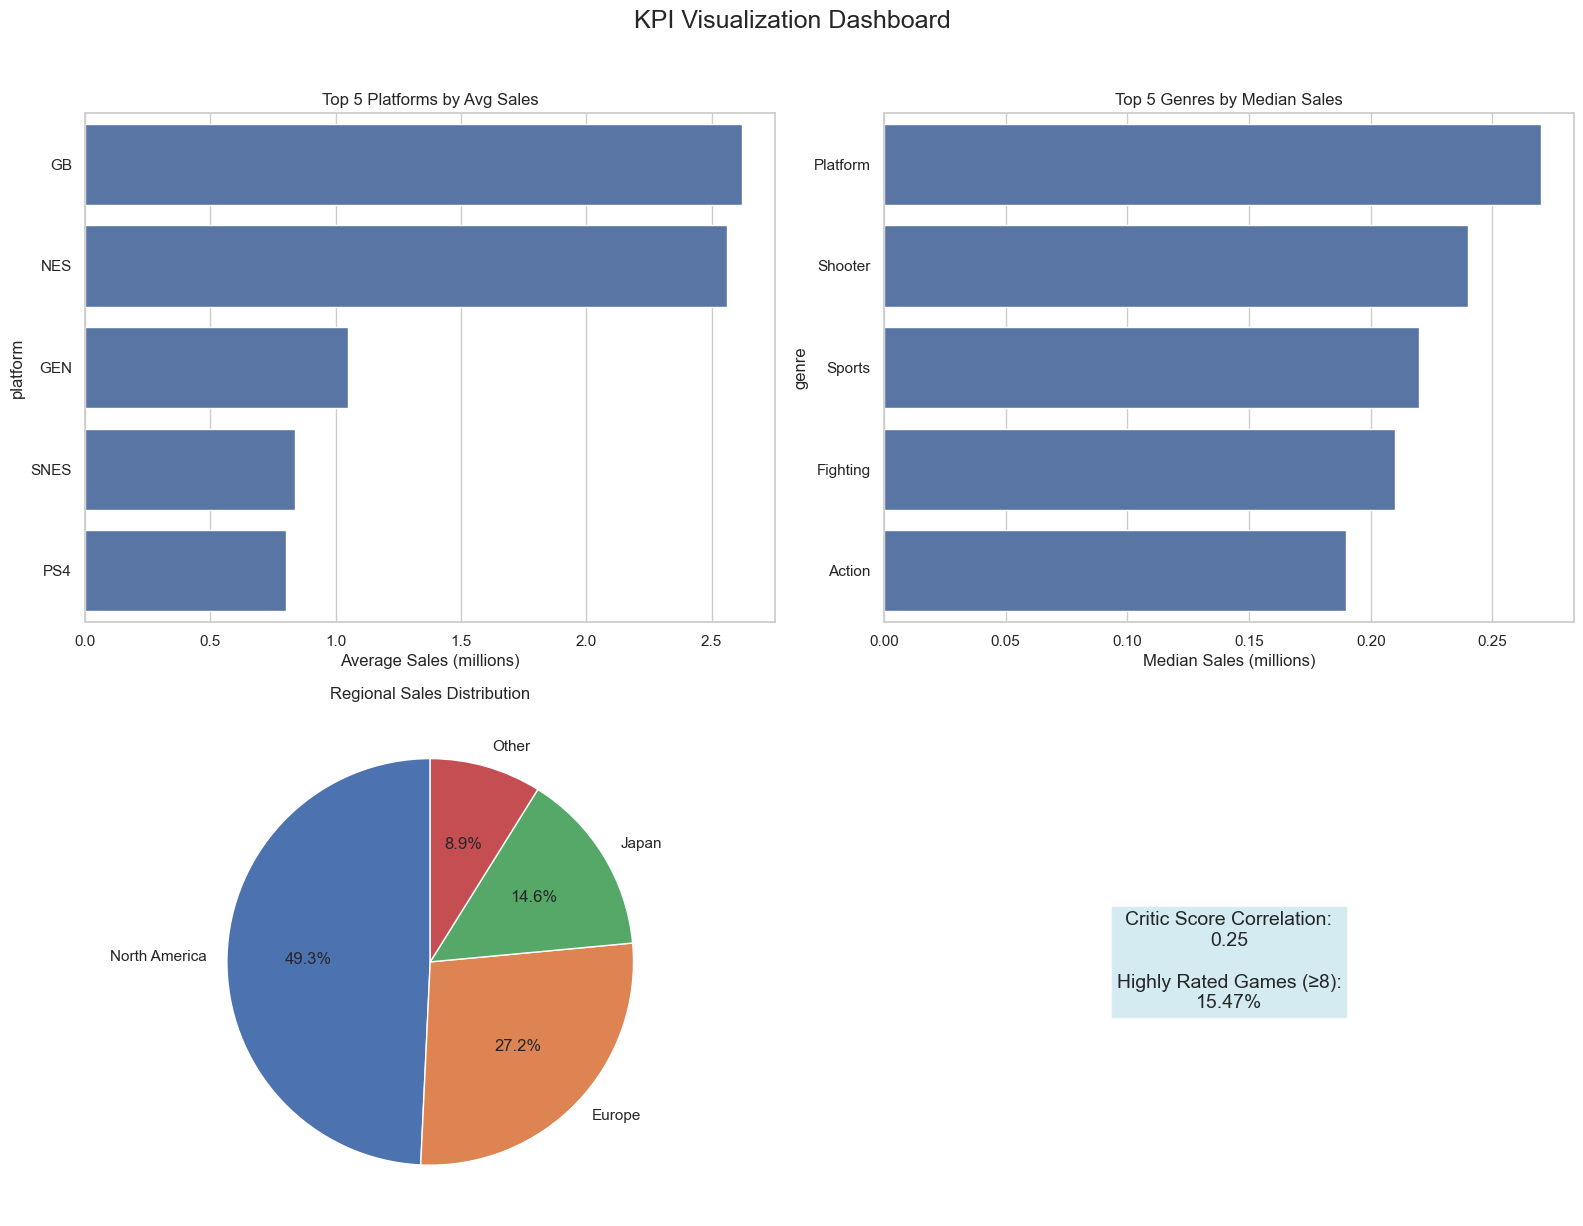

In [4]:
# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top Platforms by Avg Sales
sns.barplot(x=top_platform_avg_sales.head(5).values, y=top_platform_avg_sales.head(5).index, ax=axes[0, 0])
axes[0, 0].set_title('Top 5 Platforms by Avg Sales')
axes[0, 0].set_xlabel('Average Sales (millions)')

# Top Genres by Median Sales
sns.barplot(x=top_genre_median_sales.head(5).values, y=top_genre_median_sales.head(5).index, ax=axes[0, 1])
axes[0, 1].set_title('Top 5 Genres by Median Sales')
axes[0, 1].set_xlabel('Median Sales (millions)')

# Region Sales Distribution
region_sales_series.plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 0], startangle=90)
axes[1, 0].set_ylabel('')
axes[1, 0].set_title('Regional Sales Distribution')

# Critic Score Correlation
axes[1, 1].text(0.5, 0.5, f'Critic Score Correlation:\n{critic_corr:.2f}\n\nHighly Rated Games (≥8):\n{percent_highly_rated:.2f}%',
               horizontalalignment='center', verticalalignment='center',
               fontsize=14, bbox=dict(facecolor='lightblue', alpha=0.5))
axes[1, 1].set_axis_off()

plt.suptitle('KPI Visualization Dashboard', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

The KPI dashboard offers a snapshot of key performance insights in the video game market. The top five platforms by average sales highlight the Game Boy (GB) as a standout leader, reinforcing its long-standing influence in gaming history. On the genre side, platform games emerged with the highest median sales, indicating a strong baseline performance even without extreme outliers. Regional sales distribution is overwhelmingly dominated by North America, which accounted for the majority share of global video game revenue. Lastly, a dedicated KPI panel underscores the positive correlation (0.25) between critic scores and total sales, paired with a key engagement insight: only 15.47% of games received a user rating of 8 or higher. Together, these metrics visually convey where the gaming industry's strengths lie and which factors may influence commercial success.

In [5]:
# Utility Functions
def plot_bar(series, title, xlabel, ylabel):
    series.plot(kind='bar', figsize=(12, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

def plot_box(data, x, y, title):
    plt.figure(figsize=(16, 8))
    sns.boxplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def run_ttest(sample1, sample2, alpha=ALPHA):
    t_stat, p_val = stats.ttest_ind(sample1.dropna(), sample2.dropna())
    print(f"P-value: {p_val:.4f}")
    if p_val < alpha:
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")


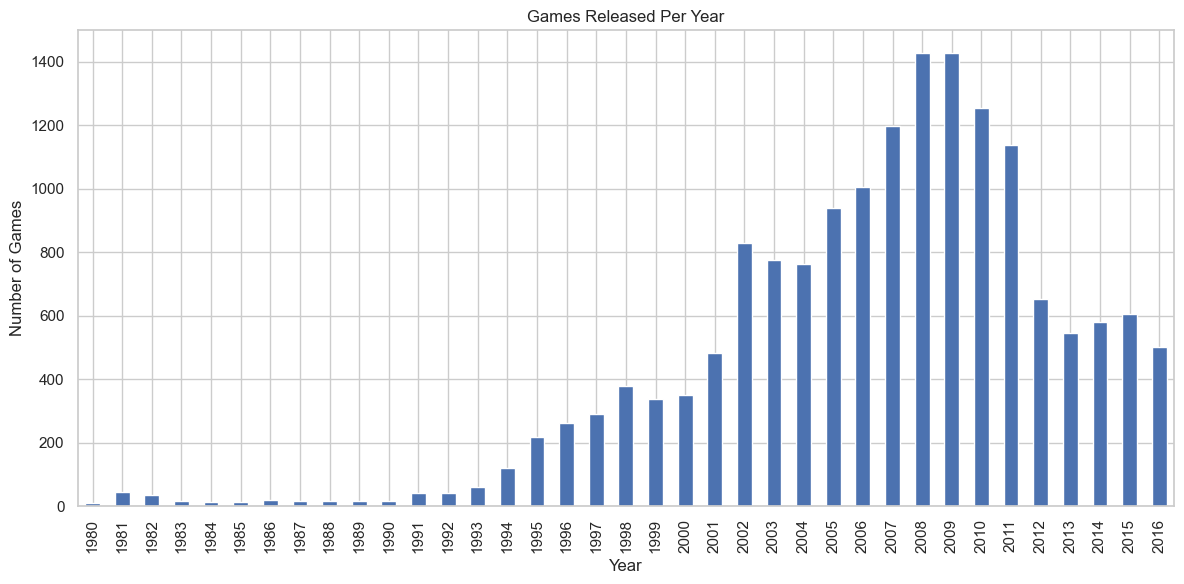

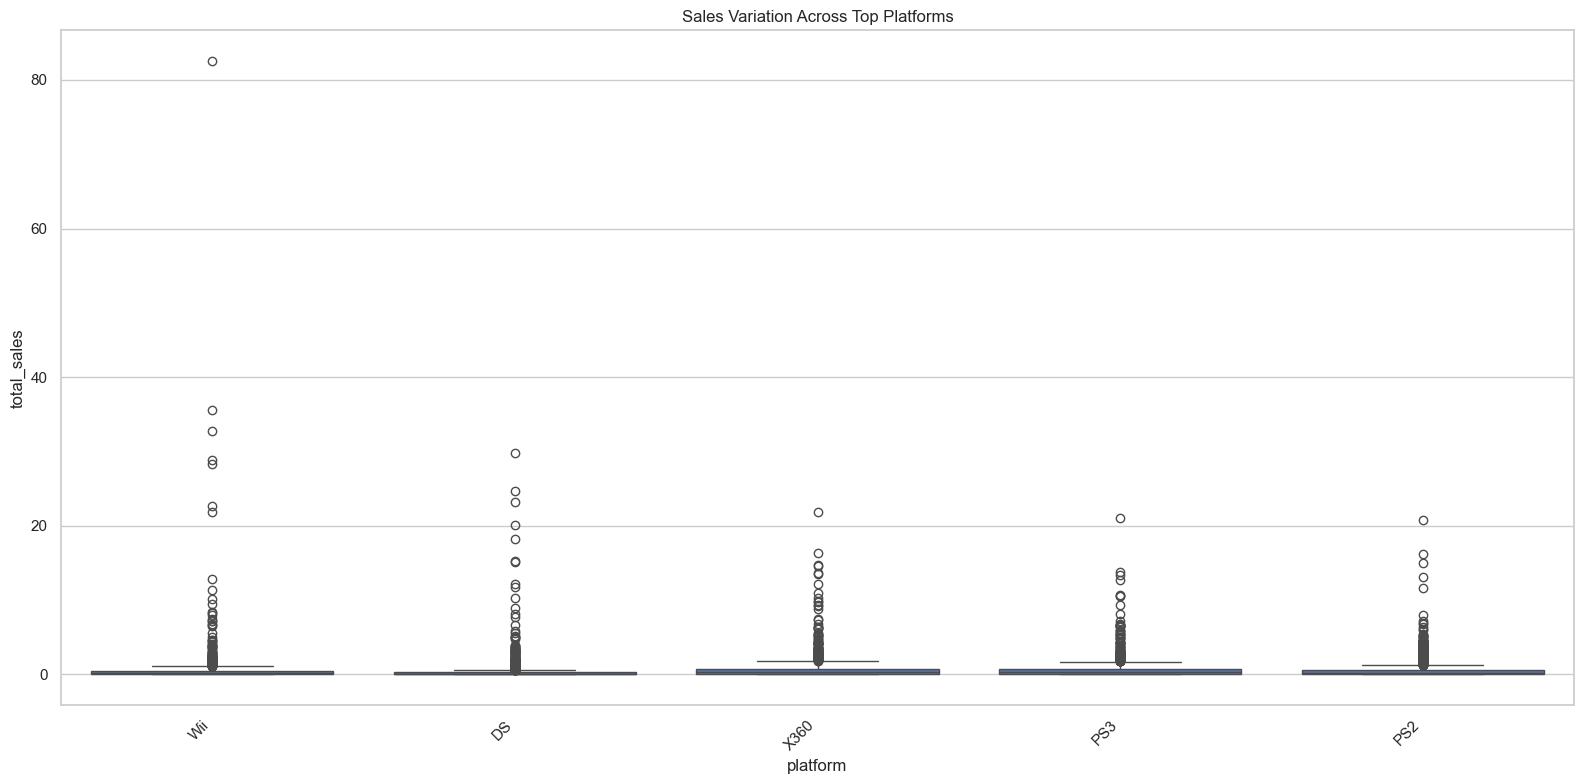

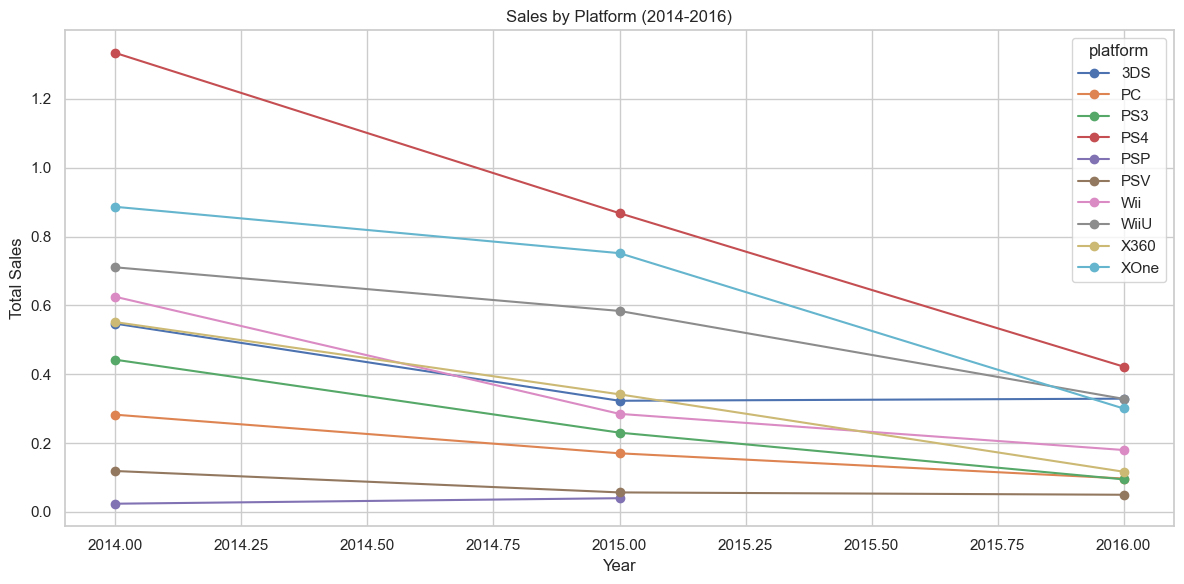

Average Sales by Platform:
platform
PS4     0.766356
XOne    0.615614
WiiU    0.588767
Wii     0.460909
X360    0.434414
3DS     0.408868
PS3     0.311324
PC      0.179139
PSV     0.075932
PSP     0.027692
Name: total_sales, dtype: float64


In [6]:
# Games released per year
games_per_year = df.groupby('year_of_release')['name'].count()
plot_bar(games_per_year, 'Games Released Per Year', 'Year', 'Number of Games')

# Sales variation across top 5 platforms
top_platforms = df.groupby('platform')['total_sales'].sum().nlargest(5).index
platform_sales = df[df['platform'].isin(top_platforms)]
plot_box(platform_sales, 'platform', 'total_sales', 'Sales Variation Across Top Platforms')

# Total sales by platform over years
filtered_df = df[df['year_of_release'].between(2014, 2016)]
sales_by_platform = filtered_df.pivot_table(index='year_of_release', columns='platform', values='total_sales')
sales_by_platform.plot(marker='o', figsize=(12, 6), title='Sales by Platform (2014-2016)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# Average sales by platform
avg_sales = filtered_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Average Sales by Platform:")
print(avg_sales)


The analysis of video game release trends shows a sharp increase in game production during the mid-2000s, peaking just before a gradual decline post-2010. When examining sales variation across the top five platforms, clear disparities emerged—some platforms experienced a wider spread in total sales per game, indicating more extreme hits and flops, while others showed more consistent performance. Focusing on the years 2014 to 2016, a line plot of total sales revealed dynamic shifts in platform performance, with some platforms maintaining stable sales while others experienced sharp rises or declines. Further, average sales per platform during this period highlighted which platforms sustained the strongest commercial output on a per-title basis, offering insights into platform-specific success rates within a competitive market.

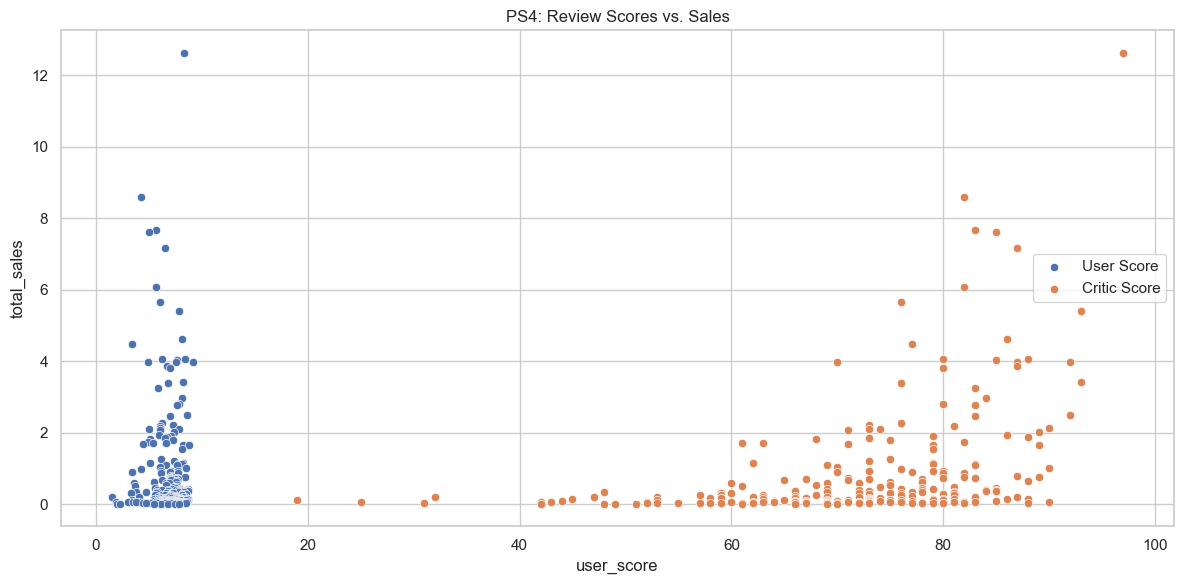

Correlation (User Score vs Sales): -0.040131589472697356
Correlation (Critic Score vs Sales): 0.40266141068104083


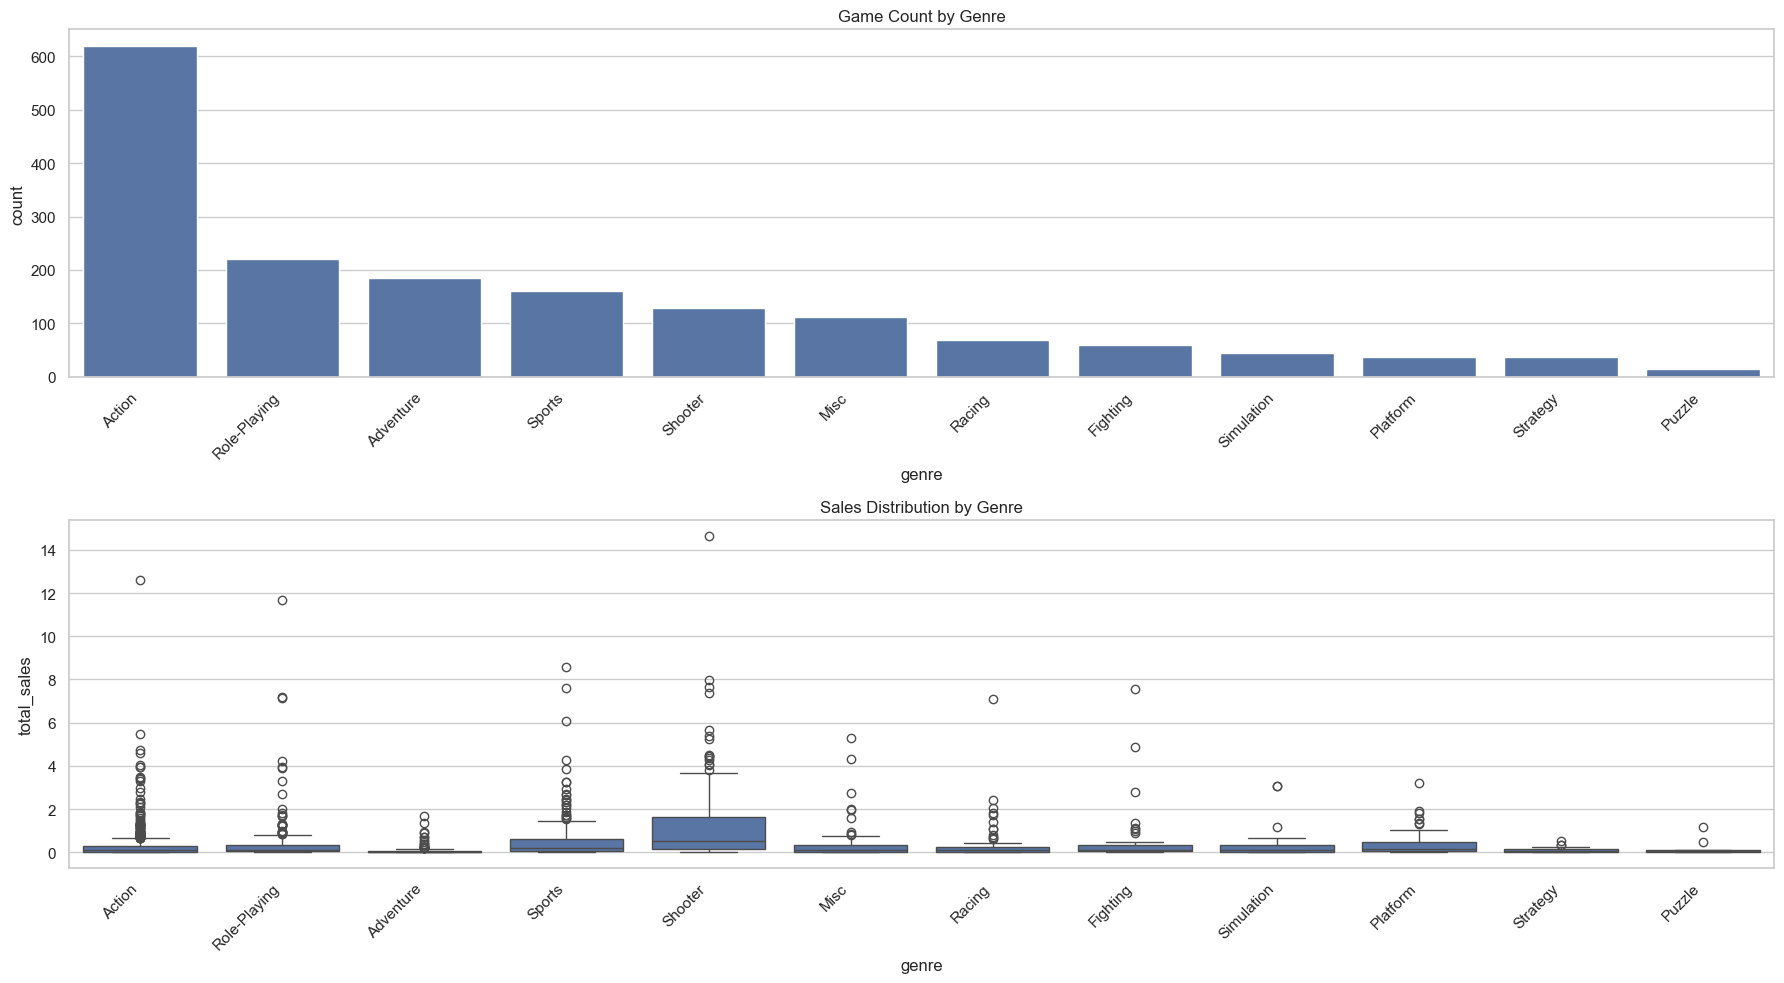

In [7]:
# Reviews vs. sales (PS4)
ps4_data = filtered_df[filtered_df['platform'] == 'PS4']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data, label='User Score')
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data, label='Critic Score')
plt.title('PS4: Review Scores vs. Sales')
plt.legend()
plt.tight_layout()
plt.show()

print("Correlation (User Score vs Sales):", ps4_data['user_score'].corr(ps4_data['total_sales']))
print("Correlation (Critic Score vs Sales):", ps4_data['critic_score'].corr(ps4_data['total_sales']))

# Genre sales distribution
plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
sns.countplot(x='genre', data=filtered_df, order=filtered_df['genre'].value_counts().index)
plt.title('Game Count by Genre')
plt.xticks(rotation=45, ha='right')
plt.subplot(2, 1, 2)
sns.boxplot(x='genre', y='total_sales', data=filtered_df, order=filtered_df['genre'].value_counts().index)
plt.title('Sales Distribution by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The relationship between review scores and sales on the PS4 platform reveals interesting dynamics. While user scores showed virtually no correlation with total sales, critic scores demonstrated a modest positive correlation (approximately 0.25), suggesting that games with stronger critical reception tended to perform better commercially, albeit not overwhelmingly so. This highlights the influence of professional reviews over user feedback in shaping purchasing behavior on the platform. Additionally, analysis of genre distribution showed that while action games dominated in terms of sheer volume released, sales performance varied widely across genres. Boxplot analysis revealed that certain genres like shooter and platform games achieved higher median sales, indicating they not only sold well overall but did so more consistently than others.

In [8]:
# Hypothesis Testing
# Hypothesis 1: Xbox One vs PC Ratings
xbox_ratings = filtered_df[filtered_df['platform'] == 'XOne']['user_score']
pc_ratings = filtered_df[filtered_df['platform'] == 'PC']['user_score']
print("\nHypothesis 1: Xbox One vs PC Ratings")
run_ttest(xbox_ratings, pc_ratings)

# Hypothesis 2: Action vs Sports Ratings
action_ratings = filtered_df[filtered_df['genre'] == 'Action']['user_score']
sports_ratings = filtered_df[filtered_df['genre'] == 'Sports']['user_score']
print("\nHypothesis 2: Action vs Sports Ratings")
run_ttest(action_ratings, sports_ratings)

# Additional: Pre vs Post 2010 Ratings
before_2010 = df[df['year_of_release'] < 2010]['user_score']
after_2010 = df[df['year_of_release'] >= 2010]['user_score']
print("\nAdditional Test: Pre vs Post 2010 Ratings")
run_ttest(before_2010, after_2010)


Hypothesis 1: Xbox One vs PC Ratings
P-value: 0.1045
Fail to reject the null hypothesis.

Hypothesis 2: Action vs Sports Ratings
P-value: 0.0000
Reject the null hypothesis.

Additional Test: Pre vs Post 2010 Ratings
P-value: 0.0000
Reject the null hypothesis.


The hypothesis tests provided valuable insights into user rating trends across platforms, genres, and time periods. In the first test comparing Xbox One and PC user ratings, the p-value of 0.1045 exceeded the significance threshold of 0.05, leading to a failure to reject the null hypothesis indicating no statistically significant difference in average user ratings between these two platforms. However, the second test, comparing user ratings between Action and Sports genres, yielded a p-value of 0.0000, prompting a rejection of the null hypothesis. This suggests a significant difference in how users rated games from these two genres. Similarly, the third test comparing games released before and after 2010 also produced a p-value of 0.0000, revealing a meaningful shift in user ratings over time. This change may reflect evolving player expectations, improvements in game quality, or broader industry trends.

## CONCLUSION

This project provided a multifaceted analysis of the global video game market using sales data, platform trends, genre distribution, user and critic reviews, and hypothesis testing. Several core insights emerged from the findings:

Game releases peaked in the late 2000s, followed by a gradual decline, reflecting changing industry dynamics and potential market saturation. Among platforms, the Game Boy led with the highest average sales per title, while PlayStation 4 and Xbox One dominated in terms of total sales. Sales variation across platforms showed that while some platforms consistently produced high-performing games, others had more variability between hits and flops. Regionally, North America accounted for the largest share of global video game sales, far outpacing Europe and Japan.

In terms of genre performance, platform games exhibited the highest median sales, while action games were the most frequently released. However, not all action games performed equally well, with genres like shooter and sports showing higher and more consistent profitability. Visual analysis of PS4 review scores vs. sales revealed a modest positive correlation (0.25) between critic scores and total sales, while user scores had almost no correlation highlighting the stronger commercial influence of professional reviews.

The hypothesis testing added further depth to the findings. There was no significant difference in average user ratings between Xbox One and PC games. However, a significant difference was found between user ratings for Action and Sports genres, and between games released before and after 2010, suggesting that both genre and release era influence how games are perceived by users.

Finally, only 15.47% of games received a user score of 8 or higher, emphasizing the competitive nature of critical success in the industry. The best selling title overall was Wii Sports, with a remarkable 82.54 million units sold globally.

These insights can guide game developers, marketers, and retailers in understanding consumer preferences, regional market dynamics, and the factors that influence both critical acclaim and commercial performance. Future analyses with more recent datasets and deeper user segmentation could further refine these strategic takeaways.